Text(0, 0.5, 'y')

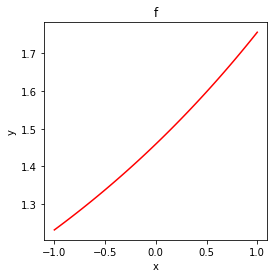

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, inv

# we need to define the function
def f(x, c): 
    return c[0] + c[1] * np.exp(c[2] * x)

# randomly choose c1,c2,c3 using np.random
c = np.random.rand(3)

# pick N xi's
N = 100
x = np.linspace(-1, 1, N)

# compute yi by evaluating f(xi, c1, c2, c3)
y = f(x, c)


plt.figure(figsize=(4,4))
plt.plot(x, y, c = 'red', label = 'f')
plt.title("f")
plt.xlabel("x")
plt.ylabel("y")

## Part 1
To do this, randomly choose (c1, c2, c3) using np.random, pick N, sample N xi’s, and compute yi by evaluating
f(xi, c1, c2, c3) for each xi. To actually solve the nonlinear least squares problem, you should write a function that implements Gauss-Newton and use it to find (c1, c2, c3). Next, add a small amount of noise to the
observed yi’s. You can use np.random.randn times a small constant and solve the problem again. For
each problem, make a plot of the predicted function, and evaluate the MMSE (the minimum mean squared
error—just the cost function for this problem).

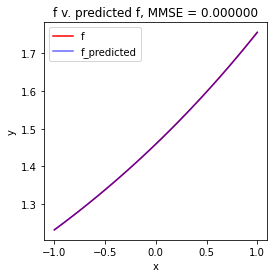

In [120]:
# implement gauss newton
def computeDf(c, x):
    '''
    x: R^m
    c: R^3
    '''
    
    Df = np.zeros((len(x), len(c)))
    Df[:,0] = 1
    Df[:,1] = np.exp(c[2] * x)
    Df[:,2] = c[1] * np.exp(c[2] * x) * x
    return Df

def GaussNewton(c0, x, y): 
    '''
    given some observations y and a starting point x0
    '''
    maxIter = 1000
    tol = 1e-2 #
    
    # initial state
    res = y - f(x, c0) # Residues from starting point
    res_norms = [norm(res)]
    i = 0
    c = c0
    alpha = 1

    while norm(res) > tol and i < maxIter: 
        # compute Df at current c
        Df = computeDf(c,x)
        
        #iterate 
        step = inv(Df.T @ Df) @ Df.T @ res
        delta_c = alpha * step
        
        # make an educated guess
        j = 0
        while norm(y - f(x,c + delta_c))**2 >= norm(res)**2 and j < 5: 
            alpha *= 0.9
            delta_c = alpha * step
            j += 1
        
        # make the step
        c = c + delta_c
        
        res = y - f(x, c)
        res_norms.append(norm(res))
        i += 1
        
    return c, res_norms

# choose a starting point
c0 = np.random.rand(3)

c_hat, res_norms = GaussNewton(c0, x, y)
MMSE = (res_norms[-1]**2)/N

plt.figure(figsize=(4,4))
plt.plot(x, y, c = 'red', label = 'f')
x2 = np.linspace(-1, 1, N)
y2 = f(x, c_hat)
plt.plot(x2, y2, c = 'blue', alpha=0.6, label = 'f_predicted')
plt.title('f v. predicted f, MMSE = {0:.6f}'.format(MMSE))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

now lets add some noise to yi: 

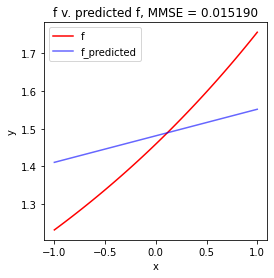

In [121]:
# add a small amount of noise to yi's
noiseMagnitude = 0.1
y_noise = y + noiseMagnitude * np.random.randn(N)

# solve problem again
c_hat, res_norms = GaussNewton(c0, x, y_noise)
MMSE = (res_norms[-1]**2)/N
plt.figure(figsize=(4,4))
plt.plot(x, y, c = 'red', label = 'f')

x2 = np.linspace(-1, 1, N)
y2 = f(x, c_hat)
plt.plot(x2, y2, c = 'blue', alpha=0.6, label = 'f_predicted')
plt.title('f v. predicted f, MMSE = {0:.6f}'.format(MMSE))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## Part 2
Go through the process described above for several different choices of parameters, different choices of
N, and different noise intensities (vary the small parameter multiplying the output from np.random.randn)

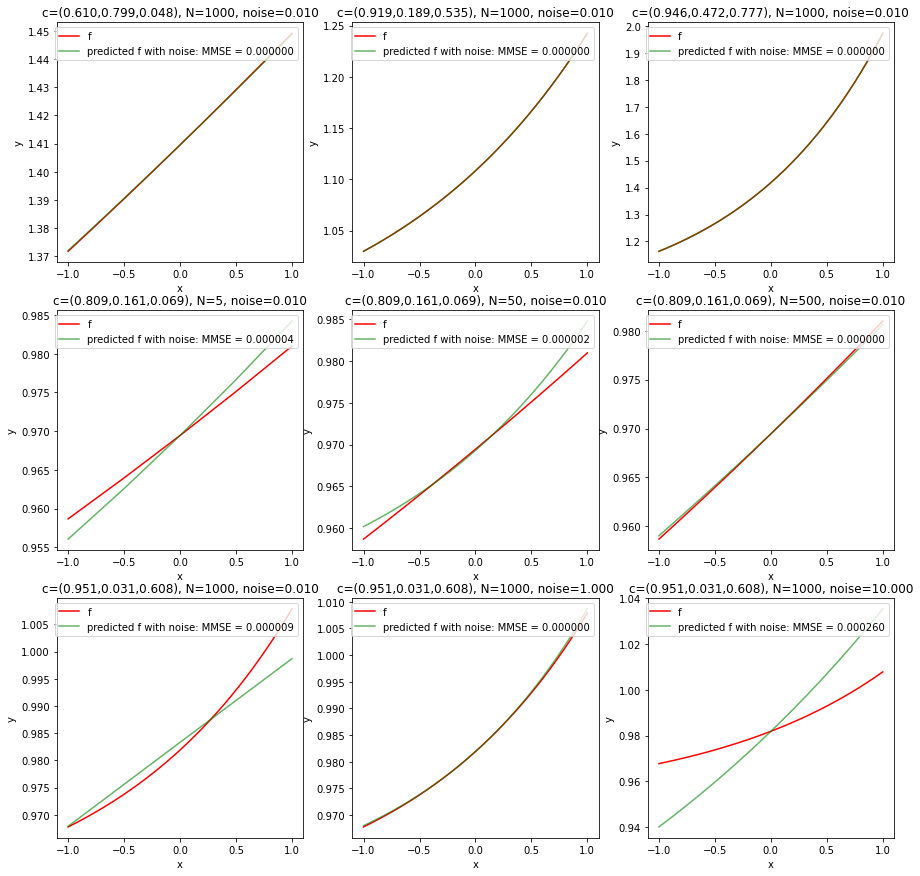

In [122]:
def process(c, N, noiseMagnitude, ax): 
    x = np.linspace(-1, 1, N)
    y = f(x, c)
    
        
    # noise included when constructing y
    y_hat = y + noiseMagnitude * np.random.randn(N)
    
    # choose a starting point
    c0 = np.random.rand(3)

    # solve problem again
    c_hat, res_norms = GaussNewton(c0, x, y)
    MMSE_noise = (res_norms[-1]**2)/N
    
    ax.plot(x, y, c = 'red', label = 'f')
    x2 = np.linspace(-1, 1, N)
    y2 = f(x, c_hat)
    ax.plot(x2, y2, c = 'green', alpha=0.6, label = 'predicted f with noise: MMSE = {:.6f}'.format(MMSE_noise))
    ax.set_title('c=({:.3f},{:.3f},{:.3f}), N={:d}, noise={:.3f}'.format(c[0],c[1],c[2], N, noiseMagnitude))
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

    
fig, axes = plt.subplots(3,3,figsize = (15,15))

# 3 choices of parameters
for i in range(3): 
    process(np.random.rand(3),1000, 0.01, axes[0][i])

# # 3 choices of N
c = np.random.rand(3)
Ns = [5, 50, 500]
for i in range(len(Ns)): 
    process(c, Ns[i], 0.01, axes[1][i])
    
# # 3 choices of noise intensities
c = np.random.rand(3)
noises = [0.01, 1, 10]
for i in range(len(noises)): 
    process(c, 1000, noises[i], axes[2][i])

## 1 paragraph explanation

In part 1, I found that when no noises are added, the gaussian newton works perfectly, where the MMSE is almost 0. However, if some noises are added, the MMSE increases to 0.01519. This makes sense because when noises are added, we computed the gaussian newton with the affected y. In real world, we should avoid large disturbance or maybe need to analyze stability under such small disturbance. This is generalized in part 2. In part 2 row 3, MMSE largely increases (from 1e-6 to 1e-4 level) as the noise largely increases (from 1 to 10). For other factors, part 2 row 1 shows the behavior of gaussian newton under different parameters with the same small noise. This makes sense because parameters of the real function should not affect the result that much with relative small noises compared to it. Part 2 row 2 shows that with larger sample size the MMSE reduces under same parameters of functions and noise level. This also makes sense because larger sample can better represent the population, which gives as more likely result compared to the real function. 